In [2]:
from scipy.ndimage.filters import gaussian_filter
import pandas as pd 
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import pyxdf

recording_location = r"C:\Users\Bolo\Desktop\Laboratorio\incipit\data\pupil_emotibit\ES0001_S002_PC_EM\data\pupil_labs\002"

def print_file_structure(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print(f'{subindent}{f}')
print_file_structure(recording_location)


002/
    annotation.pldata
    annotation_timestamps.npy
    blinks.pldata
    blinks_timestamps.npy
    eye0.intrinsics
    eye0.mp4
    eye0_lookup.npy
    eye0_timestamps.npy
    eye1.intrinsics
    eye1.mp4
    eye1_lookup.npy
    eye1_timestamps.npy
    fixations.pldata
    fixations_timestamps.npy
    gaze.pldata
    gaze_timestamps.npy
    info.player.json
    notify.pldata
    notify_timestamps.npy
    pupil.pldata
    pupil_timestamps.npy
    square_marker_cache
    surface_definitions_v01
    user_info.csv
    world.intrinsics
    world.mp4
    world_lookup.npy
    world_timestamps.npy
    exports/
        000/
            annotations.csv
            blink_detection_report.csv
            blinks.csv
            export_info.csv
            fixation_report.csv
            fixations.csv
            gaze_positions.csv
            pupil_gaze_positions_info.txt
            pupil_positions.csv
            world.mp4
            world_timestamps.csv
            world_timestamps.npy
  

C:\Users\Bolo\AppData\Local\Temp\ipykernel_22056\213765242.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [3]:
exported_gaze_csv = os.path.join(recording_location, 'exports', '000', 'surfaces','gaze_positions_on_surface_Surface_1.csv')
gaze_pd_frame = pd.read_csv(exported_gaze_csv)
annotations_csv = os.path.join(recording_location, 'exports', '000', 'annotations.csv')
annotations_pd = pd.read_csv(annotations_csv)



In [4]:
image_location="../../../../data/pupil_emotibit/ES0001_S002_PC_EM/images_order"
print_file_structure(image_location)


images_order/
    Asset0001_24.tif
    Asset0002_37.tif
    Asset0003_43.tif
    Asset0004_15.tif
    Asset0005_01.tif
    Asset0006_20.tif
    Asset0007_19.tif
    Asset0008_35.tif
    Asset0009_16.tif
    Asset0010_49.tif
    Asset0011_12.tif
    Asset0012_25.tif
    Asset0014_48.tif
    Asset0015_46.tif
    Asset0016_18.tif
    Asset0017_34.tif
    Asset0018_28.tif
    Asset0020_45.tif
    Asset0021_08.tif
    Asset0022_17.tif
    Asset0024_40.tif
    Asset0026_38.tif
    Asset0027_39.tif
    Asset0028_33.tif
    Asset0029_44.tif
    Asset0030_04.tif
    Asset0031_22.tif
    Asset0032_03.tif
    Asset0033_05.tif
    Asset0034_32.tif
    Asset0035_13.tif
    Asset0036_26.tif
    Asset0037_36.tif
    Asset0039_09.tif
    Asset0040_47.tif
    Asset0041_06.tif
    Asset0042_07.tif
    Asset0043_27.tif
    Asset0044_02.tif
    Asset0045_31.tif
    Asset0046_11.tif
    Asset0047_29.tif
    Asset0048_23.tif
    Asset0049_41.tif
    Asset0050_14.tif
    Surprise01_42.tif
    Surprise02_21.t

In [4]:
images=[]
with open(image_location+'/assets.txt','r') as f:
    for image in f:
        images.append(image.replace('\n',''))
    f.close()

In [5]:
image_order=os.listdir(image_location)
image_order.remove('assets.txt')
image_order.sort(key=lambda x: int(x[x.index('_')+1:x.index('.tif')]))
image_order[0]

'Asset0005_01.tif'

In [6]:
def do_heatmap(image,gaze_on_surf_x,gaze_on_surf_y):
    grid = image.shape[0:2] # height, width of the loaded image
    heatmap_detail = 0.02 # this will determine the gaussian blur kerner of the image (higher number = more blur)

    # flip the fixation points
    # from the original coordinate system,
    # where the origin is at botton left,
    # to the image coordinate system,
    # where the origin is at top left
    gaze_on_surf_y = 1 - gaze_on_surf_y

    # make the histogram
    hist, x_edges, y_edges = np.histogram2d(
        gaze_on_surf_y,
        gaze_on_surf_x,
        range=[[0, 1.0], [0, 1.0]],
        bins=grid
    )


    # gaussian blur kernel as a function of grid/surface size
    filter_h = int(heatmap_detail * grid[0]) // 2 * 2 + 1
    filter_w = int(heatmap_detail * grid[1]) // 2 * 2 + 1
    heatmap = gaussian_filter(hist, sigma=(filter_w, filter_h), order=0)

    # display the histogram and reference image
    print("Cover image with heatmap overlay")
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    plt.imshow(heatmap, cmap='jet', alpha=0.5)
    plt.axis('off');


lets filter properly by asset

In [7]:

conf_thr=0.95
gaze_on_surf=gaze_pd_frame[(gaze_pd_frame.on_surf==True)&(gaze_pd_frame.confidence >conf_thr)]

In [8]:
gaze_on_surf.head()

,world_timestamp,world_index,gaze_timestamp,x_norm,y_norm,x_scaled,y_scaled,on_surf,confidence
126,14963.965010,26,14963.972059,0.235153,0.028235,0.235153,0.028235,True,0.995
127,14963.985129,27,14963.976082,0.231901,0.055803,0.231901,0.055803,True,0.995
128,14963.985129,27,14963.980072,0.224674,0.135685,0.224674,0.135685,True,0.995
129,14963.985129,27,14963.984049,0.211314,0.187131,0.211314,0.187131,True,0.990
130,14963.985129,27,14963.988105,0.202950,0.256136,0.202950,0.256136,True,0.990


In [8]:
index_stim=annotations_pd['label']==images[41]
index_final=annotations_pd.index[index_stim]+1

value=annotations_pd[index_stim]['timestamp'].values[0]
value_final=annotations_pd.iloc[index_final]['timestamp'].values[0]
 
gaze_on_surf=gaze_on_surf[
    (gaze_on_surf['gaze_timestamp']>value)&
    (gaze_on_surf['gaze_timestamp']<value_final)

]






NameError: name 'images' is not defined

Cover image with heatmap overlay


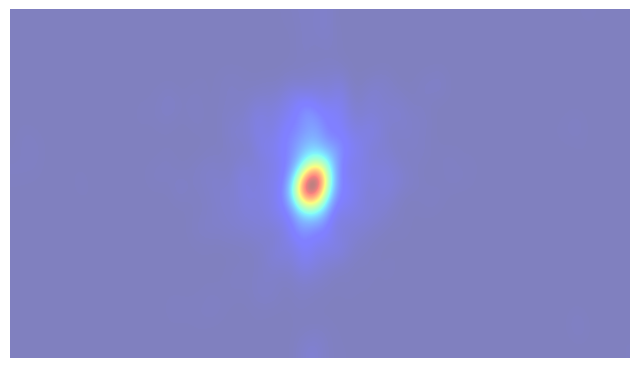

In [9]:
%matplotlib inline
image=plt.imread(image_location+'/'+image_order[41])
do_heatmap(image,gaze_on_surf['x_norm'],gaze_on_surf['y_norm'])

In [46]:
print(images[1],image_order[1]) 


Asset0044.tif Asset0044_02.tif


In [50]:
type(images[1])

str

In [61]:
image_order[41]

'Surprise01_42.tif'

In [66]:
index_stim=annotations_pd['label']==images[41]
index_final=annotations_pd.index[index_stim]+1
index_final


Int64Index([126], dtype='int64')

In [44]:
%matplotlib qt

for im,im_order in zip(images[0:3], image_order[0:3]):
    print(im,im_order)
    index_stim=annotations_pd['label']==im
    index_final=annotations_pd.index[index_stim]+1

    value=annotations_pd[index_stim]['timestamp'].values[0]
    value_final=annotations_pd.iloc[index_final]['timestamp'].values[0]
    gaze_on_surf_im=gaze_on_surf[
        (gaze_on_surf['gaze_timestamp']>value)&
        (gaze_on_surf['gaze_timestamp']<value_final)
    ]
    image=plt.imread(image_location+'/'+im_order)
    do_heatmap(image,gaze_on_surf_im['x_norm'],gaze_on_surf_im['y_norm'])
    plt.savefig('heatmaps/'+im_order)
    # plt.close()



Asset0005.tif Asset0005_01.tif
Cover image with heatmap overlay
Asset0044.tif Asset0044_02.tif
Cover image with heatmap overlay
Asset0032.tif Asset0032_03.tif
Cover image with heatmap overlay


In [24]:
    index_stim=annotations_pd['label']==images[1]
    index_final=annotations_pd.index[index_stim]+1

    value=annotations_pd[index_stim]['timestamp'].values[0]
    
    value_final=annotations_pd.iloc[index_final]['timestamp'].values[0]
 
    gaze_on_surf_im=gaze_on_surf[
        (gaze_on_surf['gaze_timestamp']>value)&
        (gaze_on_surf['gaze_timestamp']<value_final)

    ]
    image=plt.imread(image_location+'/'+image_order[1])
    do_heatmap(image,gaze_on_surf_im['x_norm'],gaze_on_surf_im['y_norm'])


Cover image with heatmap overlay


In [29]:
image_order[0:3]

['Asset0005_01.tif', 'Asset0044_02.tif', 'Asset0032_03.tif']